In [2]:
import zipfile

DATA_IN_PATH='./data_in2/'
file_list=['train.csv.zip','test.csv.zip','sample_submission.csv.zip']

for file in file_list:
    zipRef=zipfile.ZipFile(DATA_IN_PATH+file,'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [3]:
DATA_IN_PATH='./data_in2/'

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [4]:
train_data=pd.read_csv(DATA_IN_PATH+'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
print("파일 크기: ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2))+'MB')

파일 크기: 
sample_submission.csv         22.35MB
test.csv                      477.59MB
train.csv                     63.4MB


In [6]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 404290


In [7]:
train_set=pd.Series(train_data['question1'].tolist()+train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [8]:
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts()>1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, 'Number of questions')

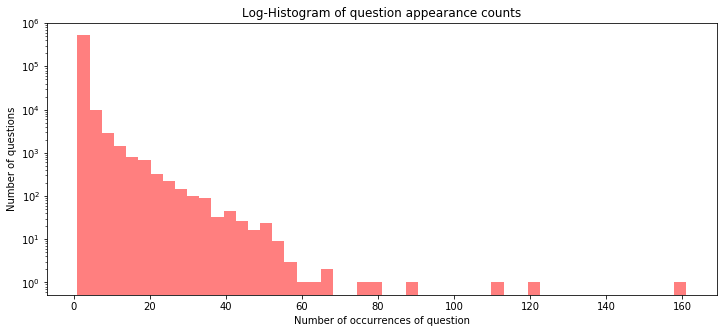

In [9]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값들에 대한 버켓 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [10]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
print('제1사분위 중복: {}'.format(np.percentile(train_set.value_counts(),25)))
print('제3사분위 중복: {}'.format(np.percentile(train_set.value_counts(),75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제1사분위 중복: 1.0
제3사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f1033e8a88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1033dacc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1033e8788>],
 'medians': [<matplotlib.lines.Line2D at 0x1f10339b548>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1034b1ec8>],
 'means': [<matplotlib.lines.Line2D at 0x1f1034b1548>]}

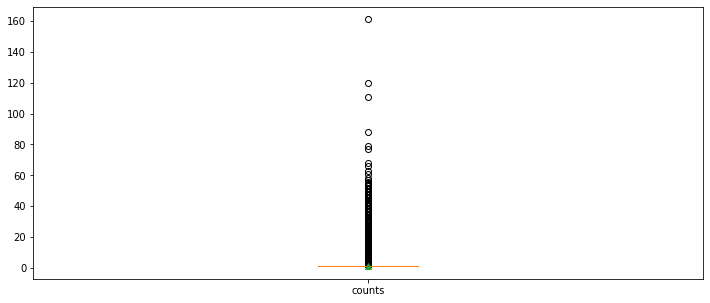

In [11]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans : 평균값을 마크함

plt.boxplot([train_set.value_counts()],labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

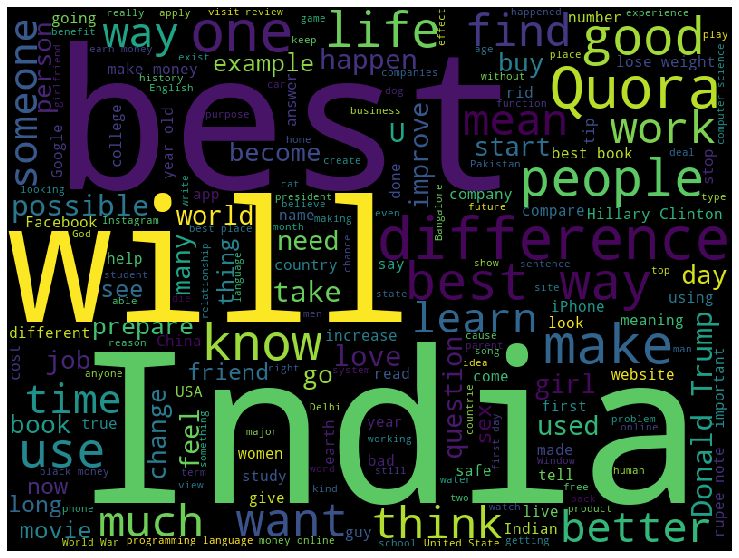

In [12]:
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

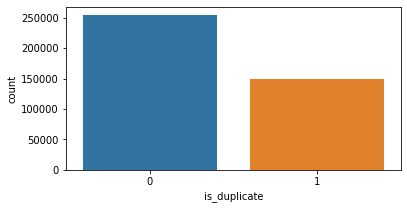

In [13]:
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])

In [14]:
train_length=train_set.apply(len)

C:\Users\yuhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Probability')

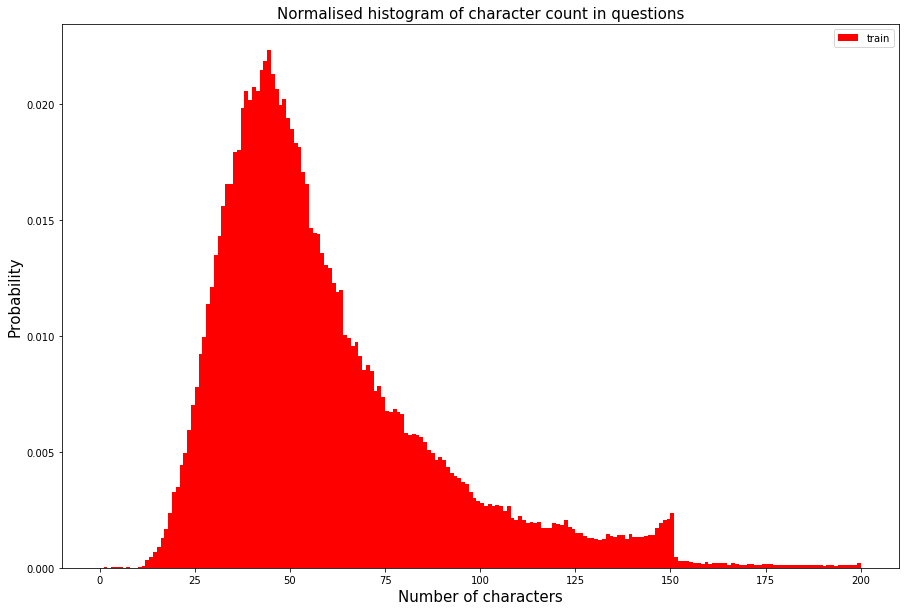

In [15]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', normed=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [16]:
print('질문 길이 최댓값: {}'.format(np.max(train_length)))
print('질문 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간값: {}'.format(np.median(train_length)))
print('질문 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최댓값: 1169
질문 길이 평균값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간값: 51.0
질문 길이 제1사분위: 39.0
질문 길이 제3사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f108b2ad88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f108b2b308>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f108b2aac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f108b32b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f108b360c8>],
 'means': [<matplotlib.lines.Line2D at 0x1f108b35b08>]}

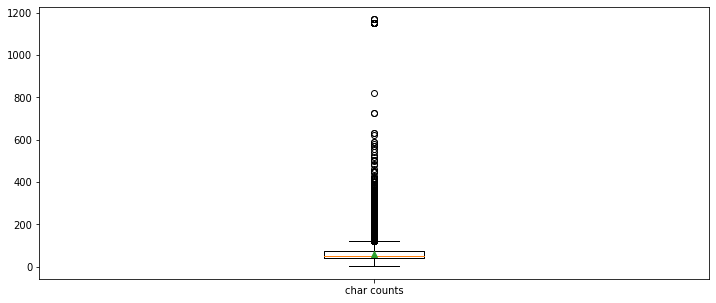

In [17]:
plt.figure(figsize=(12,5))

plt.boxplot(train_length,labels=['char counts'],showmeans=True)

In [18]:
train_word_counts=train_set.apply(lambda x:len(x.split(' ')))

C:\Users\yuhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Probability')

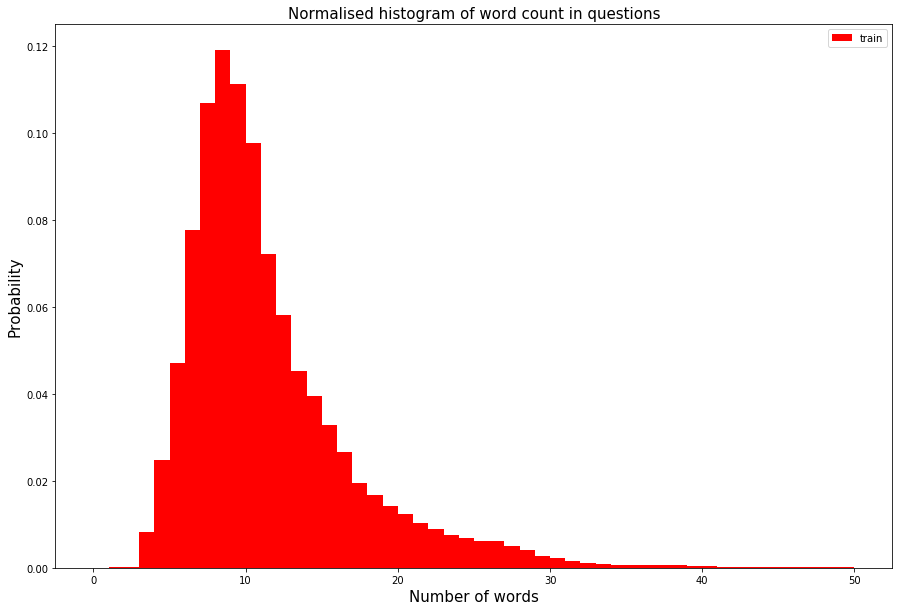

In [21]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor='r', normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [22]:
print('질문 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts,25)))
print('질문 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts,75)))
print('질문 단어 개수 99퍼센트: {}'.format(np.percentile(train_word_counts,99)))

질문 단어 개수 최댓값: 237
질문 단어 개수 평균값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간값: 10.0
질문 단어 개수 제1사분위: 7.0
질문 단어 개수 제3사분위: 13.0
질문 단어 개수 99퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f13ebce108>,
 'caps': [<matplotlib.lines.Line2D at 0x1f13ebcc4c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f108a0ca08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f13ebd1a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f13ebd5b08>],
 'means': [<matplotlib.lines.Line2D at 0x1f13ebd5d08>]}

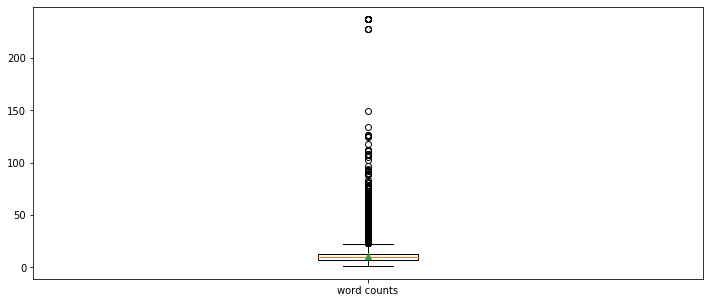

In [23]:
plt.figure(figsize=(12,5))

plt.boxplot(train_word_counts,labels=['word counts'], showmeans=True)

In [24]:
# 물음표가 구두점으로 쓰임
qmarks=np.mean(train_set.apply(lambda x: '?' in x))
# []
math=np.mean(train_set.apply(lambda x: '[math]' in x))
# 마침표
fullstop=np.mean(train_set.apply(lambda x: '.' in x))
# 첫 번째 대문자
capital_first=np.mean(train_set.apply(lambda x: x[0].isupper()))
# 대문자가 몇개
capitals=np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
# 숫자가 몇 개
numbers=np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks*100))
print('수학 태그가 있는 질문: {:.2f}%'.format(math*100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop*100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first*100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals*100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers*100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자인 질문: 99.81%
대문자가 있는 질문: 99.95%
숫자가 있는 질문: 11.83%
